# **Electricity**

In [52]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
%matplotlib inline 
import warnings 
warnings.filterwarnings("ignore")

In [4]:
url='electricityConsumptionAndProductioction.csv'
df=pd.read_csv(url,sep=',')
df.head()

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
0,2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30
1,2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30
2,2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30
3,2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30
4,2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30


In [5]:
df['DateTime']=pd.to_datetime(df['DateTime'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46011 entries, 0 to 46010
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DateTime       46011 non-null  datetime64[ns]
 1   Consumption    46011 non-null  int64         
 2   Production     46011 non-null  int64         
 3   Nuclear        46011 non-null  int64         
 4   Wind           46011 non-null  int64         
 5   Hydroelectric  46011 non-null  int64         
 6   Oil and Gas    46011 non-null  int64         
 7   Coal           46011 non-null  int64         
 8   Solar          46011 non-null  int64         
 9   Biomass        46011 non-null  int64         
dtypes: datetime64[ns](1), int64(9)
memory usage: 3.5 MB
None


In [6]:
df.shape

(46011, 10)

In [7]:
print(df['DateTime'].min())
print(df['DateTime'].max())

2019-01-01 00:00:00
2024-03-31 23:00:00


In [8]:
df.columns

Index(['DateTime', 'Consumption', 'Production', 'Nuclear', 'Wind',
       'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass'],
      dtype='object')

## **EDA**

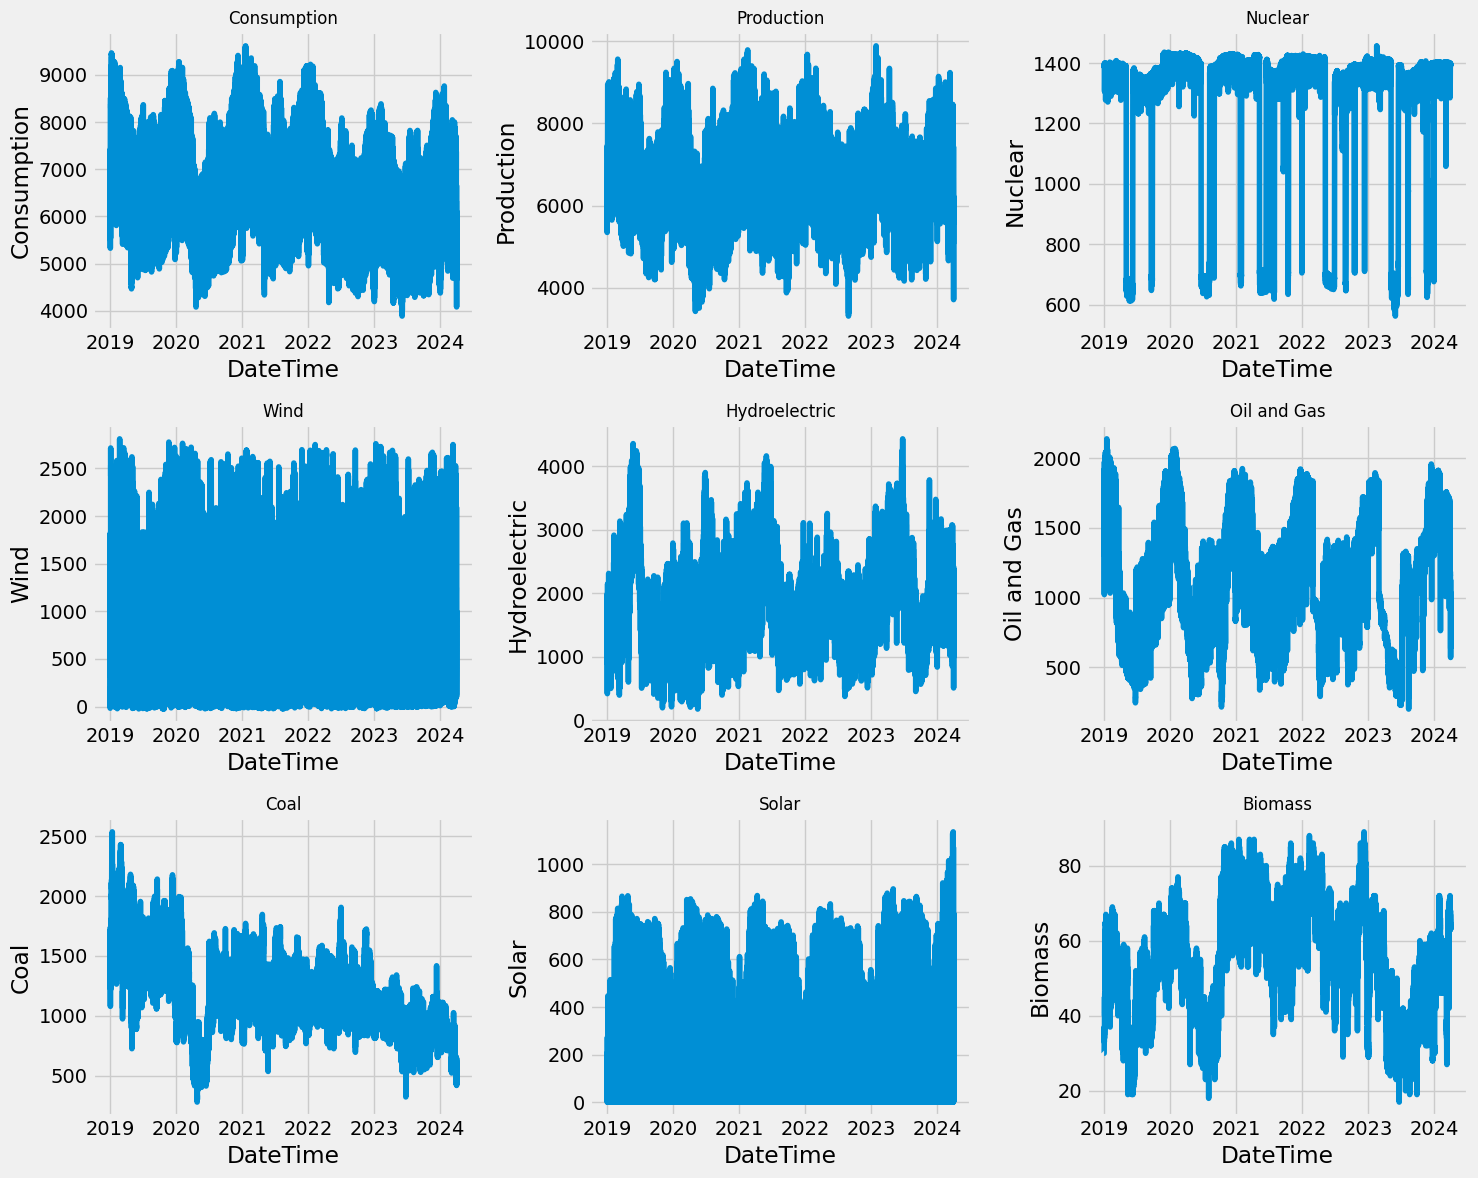

In [9]:
plt.style.use('fivethirtyeight')
col_1=['Consumption', 'Production', 'Nuclear', 'Wind',
       'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']
# Crea una grilla de 3x3 subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 12))

# Itera sobre las columnas y los subplots
for i, (col, ax) in enumerate(zip(col_1, axs.flat)):
    sns.lineplot(data=df, x='DateTime', y=col, ax=ax)
    ax.set_title(col, fontsize=12)

# Ajusta el layout para evitar superposición de títulos
plt.tight_layout()

# Muestra la gráfica
plt.show()

In [10]:
df_consumption = df[['DateTime','Consumption']]
df_consumption['Year']=df['DateTime'].dt.year
df_consumption.head()

,DateTime,Consumption,Year
0,2019-01-01 00:00:00,6352,2019
1,2019-01-01 01:00:00,6116,2019
2,2019-01-01 02:00:00,5873,2019
3,2019-01-01 03:00:00,5682,2019
4,2019-01-01 04:00:00,5557,2019


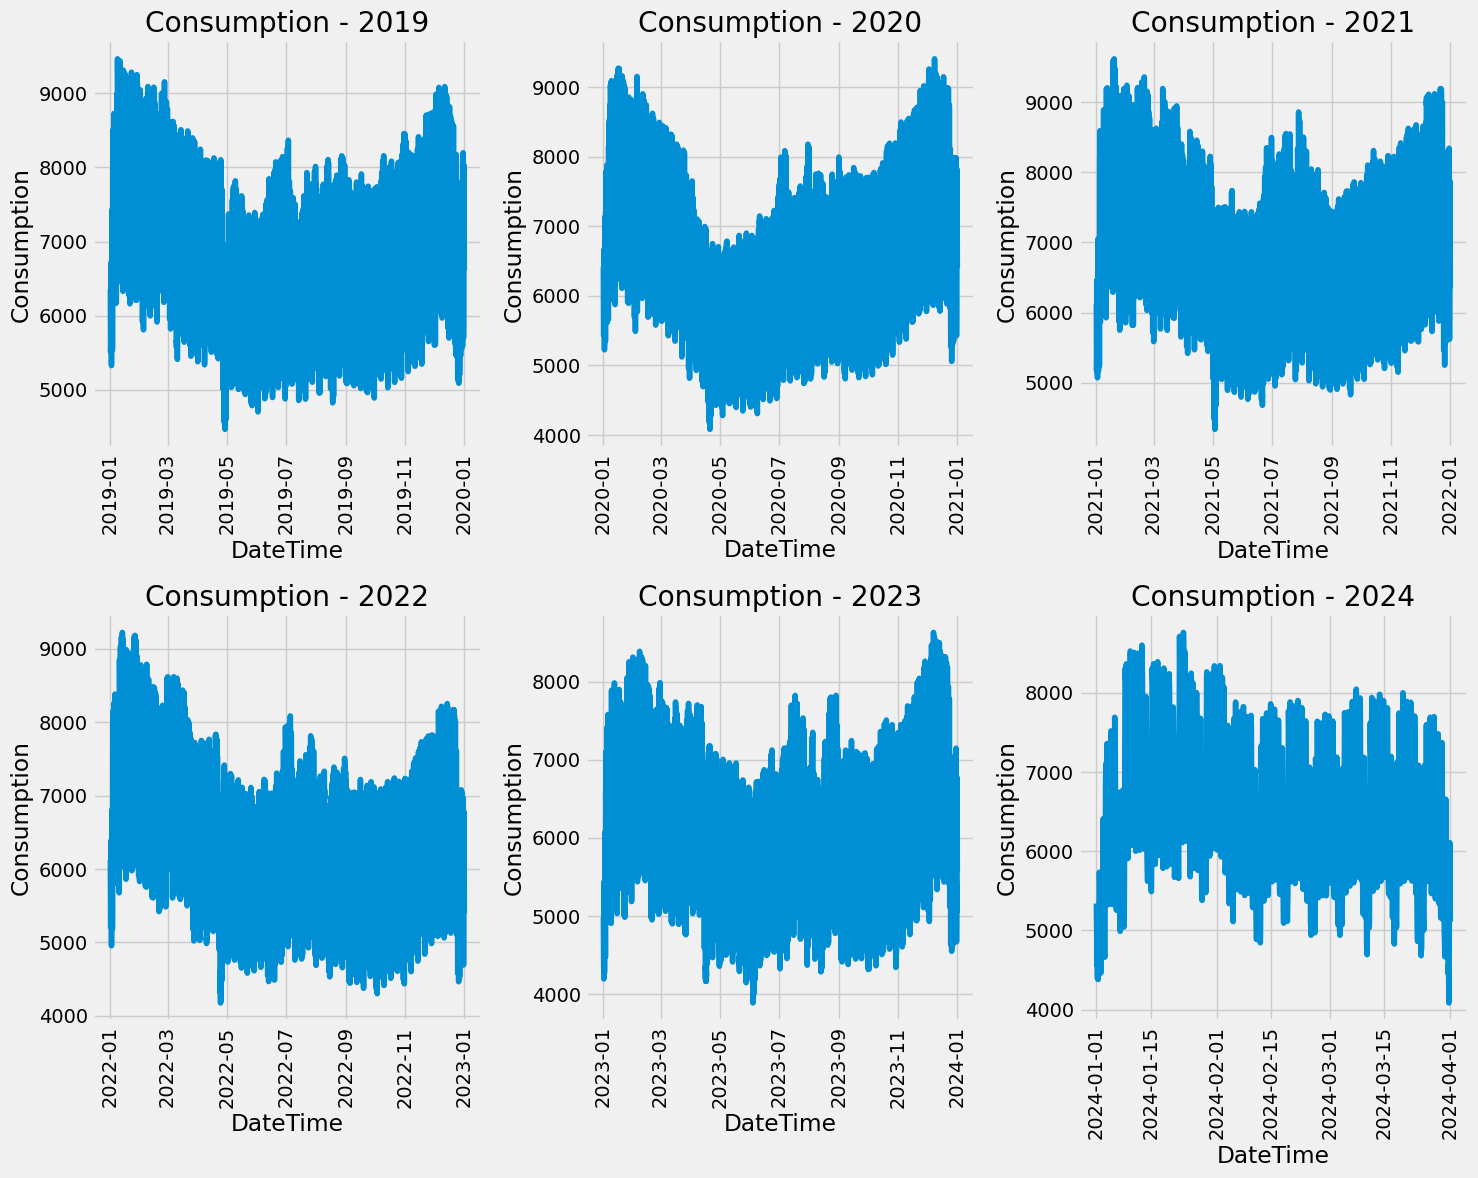

In [11]:
col_2=[2019, 2020, 2021, 2022, 2023, 2024]
fig,axs=plt.subplots(2,3,figsize=(15,12))
for i, (col,ax) in enumerate(zip(col_2,axs.flat)):
    sns.lineplot(data=df_consumption[df_consumption['Year']==col],x='DateTime',y='Consumption',ax=ax)
    ax.set_title(f'Consumption - {col}')
    ax.tick_params(axis='x',rotation=90)
plt.tight_layout()
plt.show()

**Consumption**

In [12]:
df_consumption.set_index('DateTime',inplace=True)
df_consumption.head()

,Consumption,Year
DateTime,,
2019-01-01 00:00:00,6352,2019
2019-01-01 01:00:00,6116,2019
2019-01-01 02:00:00,5873,2019
2019-01-01 03:00:00,5682,2019
2019-01-01 04:00:00,5557,2019


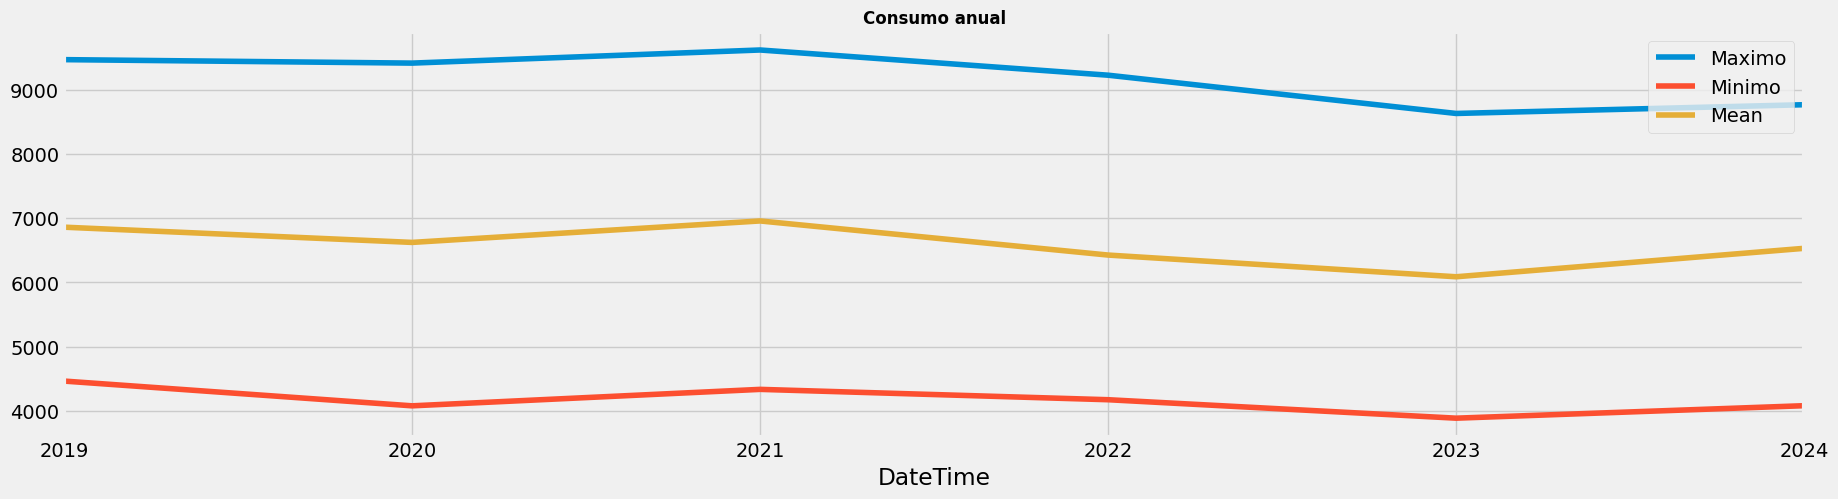

In [13]:
# Frecuencia Anual
df_consumption.resample(rule='A').max()['Consumption'].plot(figsize=(20,5),label='Maximo')
df_consumption.resample(rule='A').min()['Consumption'].plot(figsize=(20,5),label='Minimo')
df_consumption.resample(rule='A').mean()['Consumption'].plot(figsize=(20,5),label='Mean')
plt.title('Consumo anual',fontsize=12,weight='bold')
plt.legend()
plt.show()

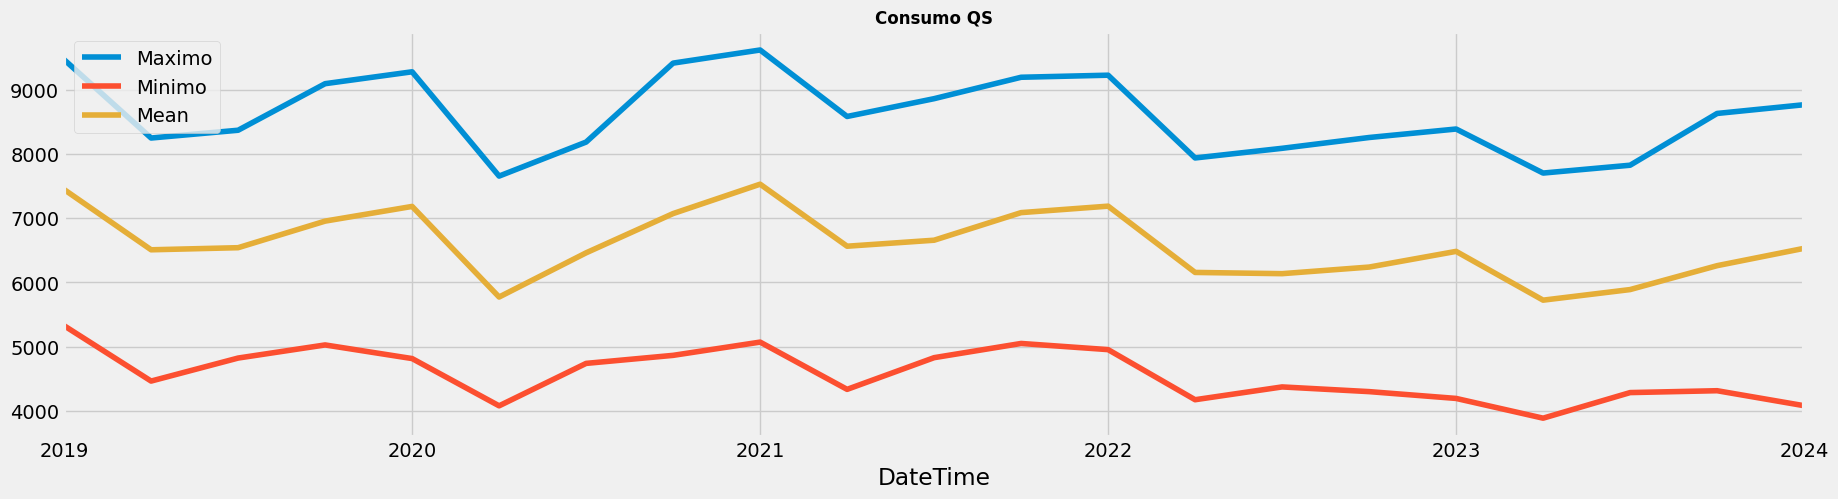

In [14]:
# Frecuencia Mensual
df_consumption.resample(rule='QS').max()['Consumption'].plot(figsize=(20,5),label='Maximo')
df_consumption.resample(rule='QS').min()['Consumption'].plot(figsize=(20,5),label='Minimo')
df_consumption.resample(rule='QS').mean()['Consumption'].plot(figsize=(20,5),label='Mean')
plt.title('Consumo QS',fontsize=12,weight='bold')
plt.legend()
plt.show()

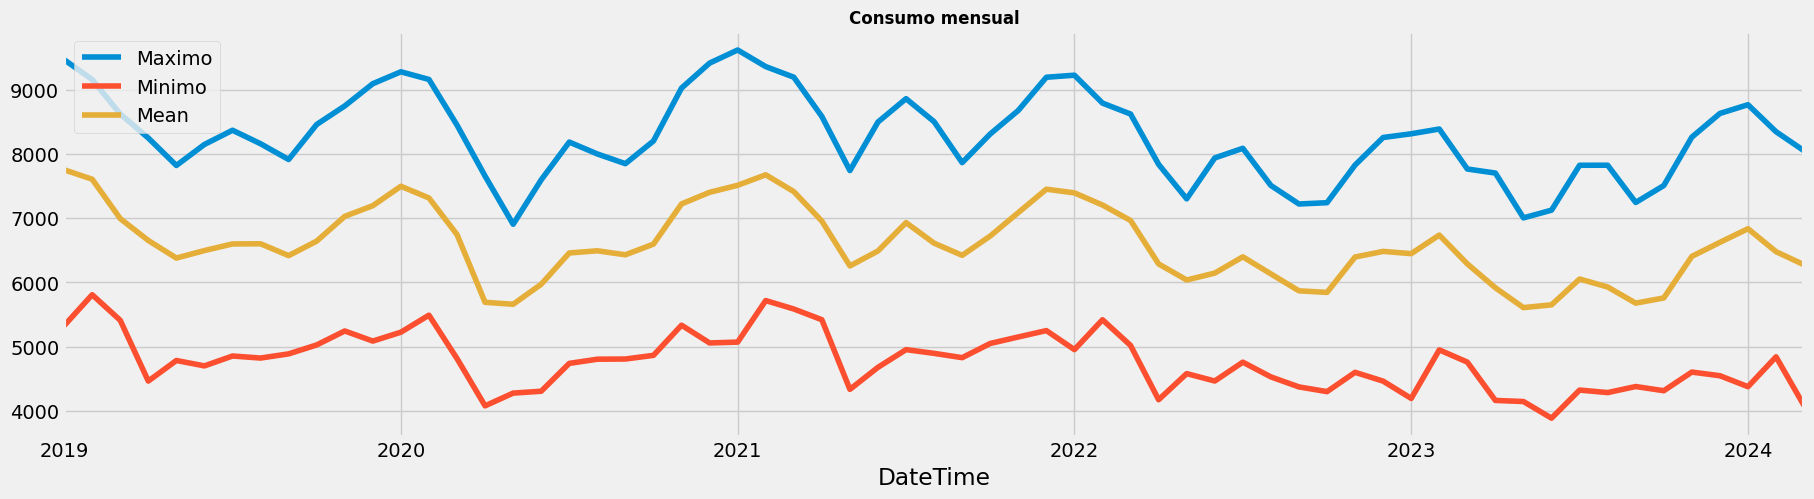

In [15]:
# Frecuencia Mensual
df_consumption.resample(rule='M').max()['Consumption'].plot(figsize=(20,5),label='Maximo')
df_consumption.resample(rule='M').min()['Consumption'].plot(figsize=(20,5),label='Minimo')
df_consumption.resample(rule='M').mean()['Consumption'].plot(figsize=(20,5),label='Mean')
plt.title('Consumo mensual',fontsize=12,weight='bold')
plt.legend()
plt.show()

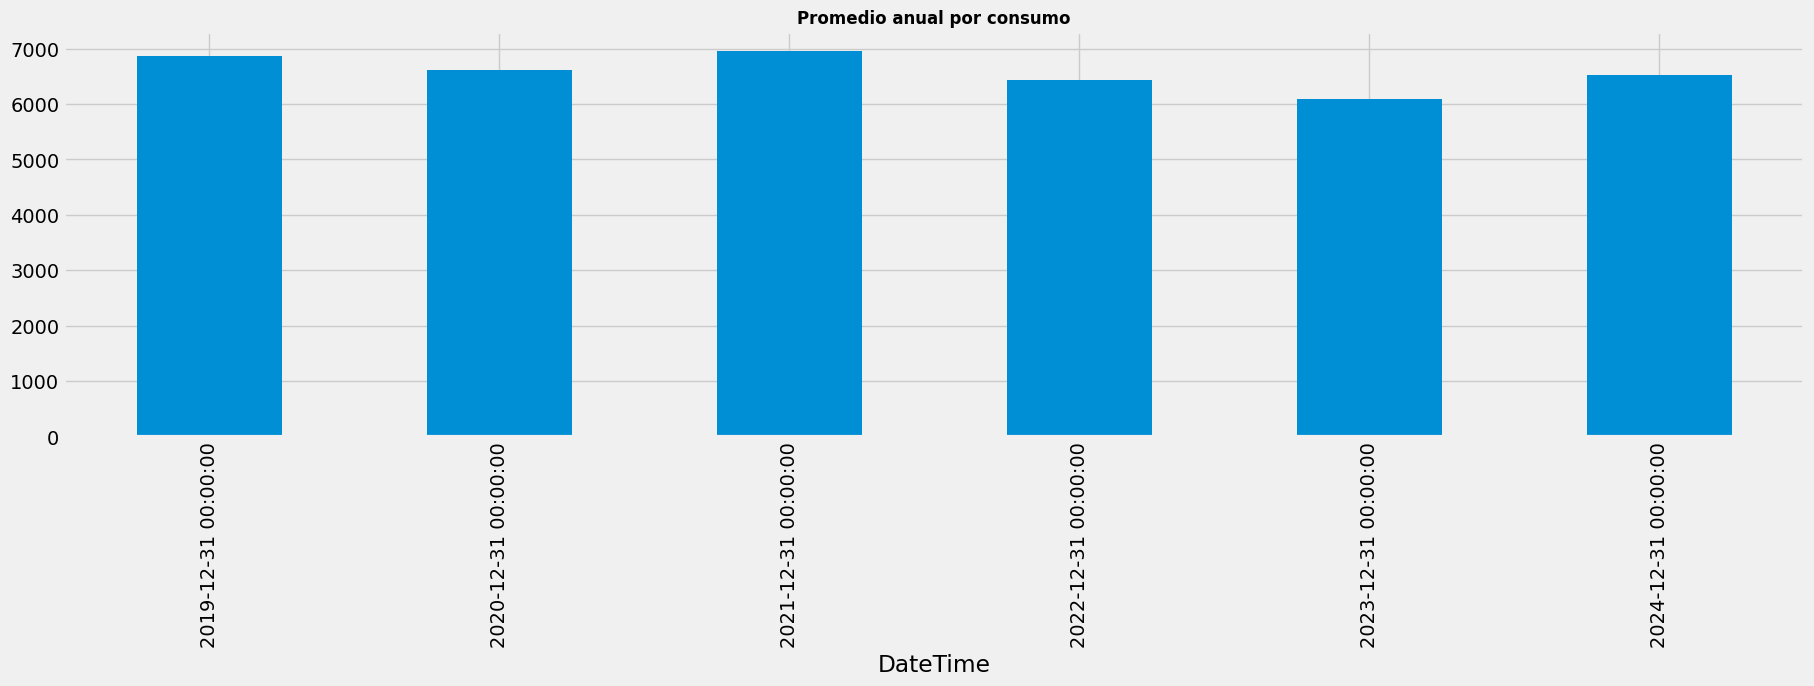

In [16]:
df_consumption['Consumption'].resample(rule='A').mean().plot(kind='bar',figsize=(20,5))
plt.title('Promedio anual por consumo',fontsize=12,weight='bold')
plt.show()

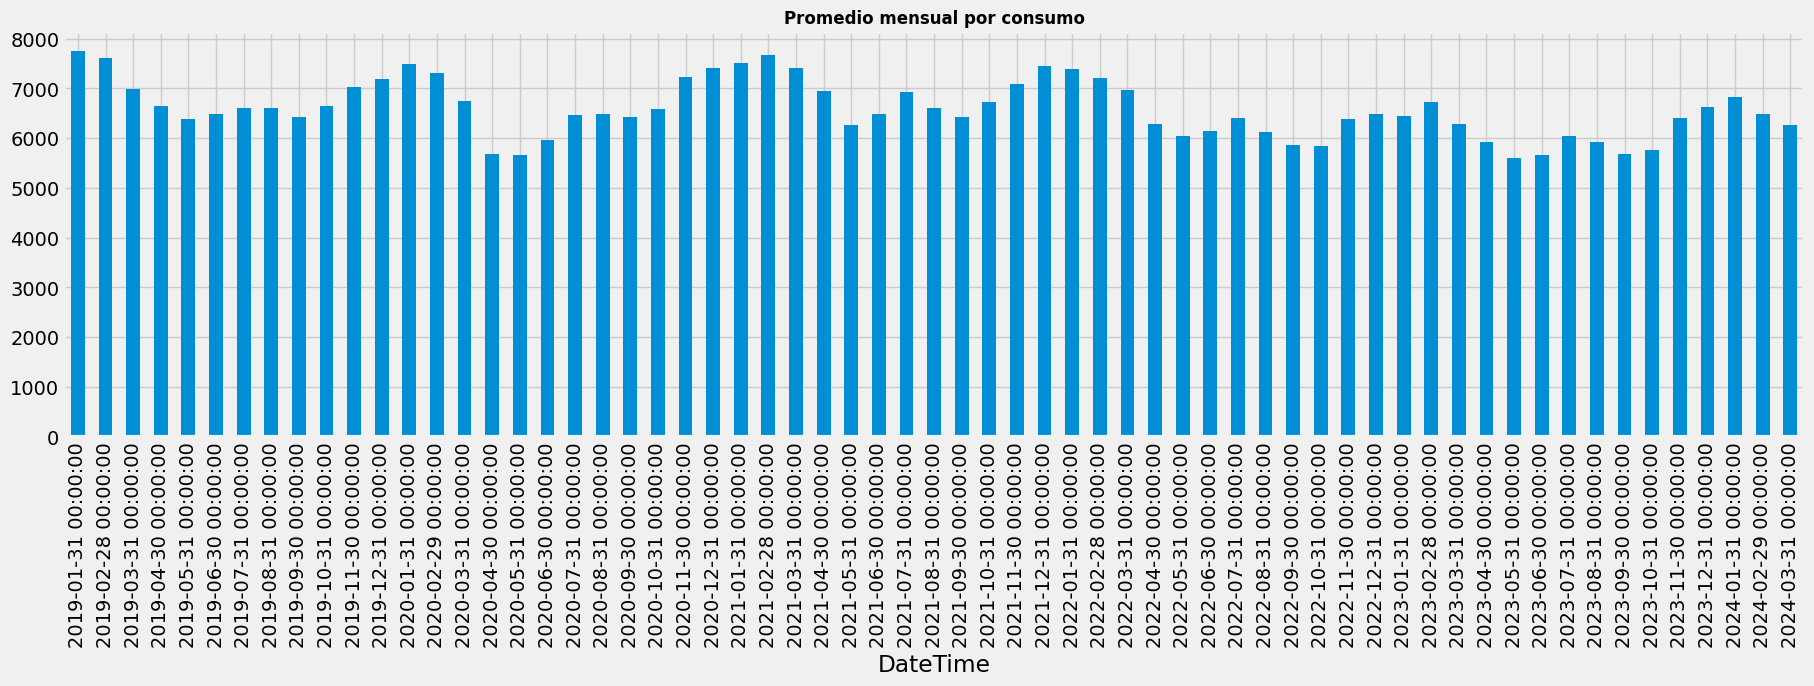

In [17]:
df_consumption['Consumption'].resample(rule='M').mean().plot(kind='bar',figsize=(20,5))
plt.title('Promedio mensual por consumo',fontsize=12,weight='bold')
plt.show()

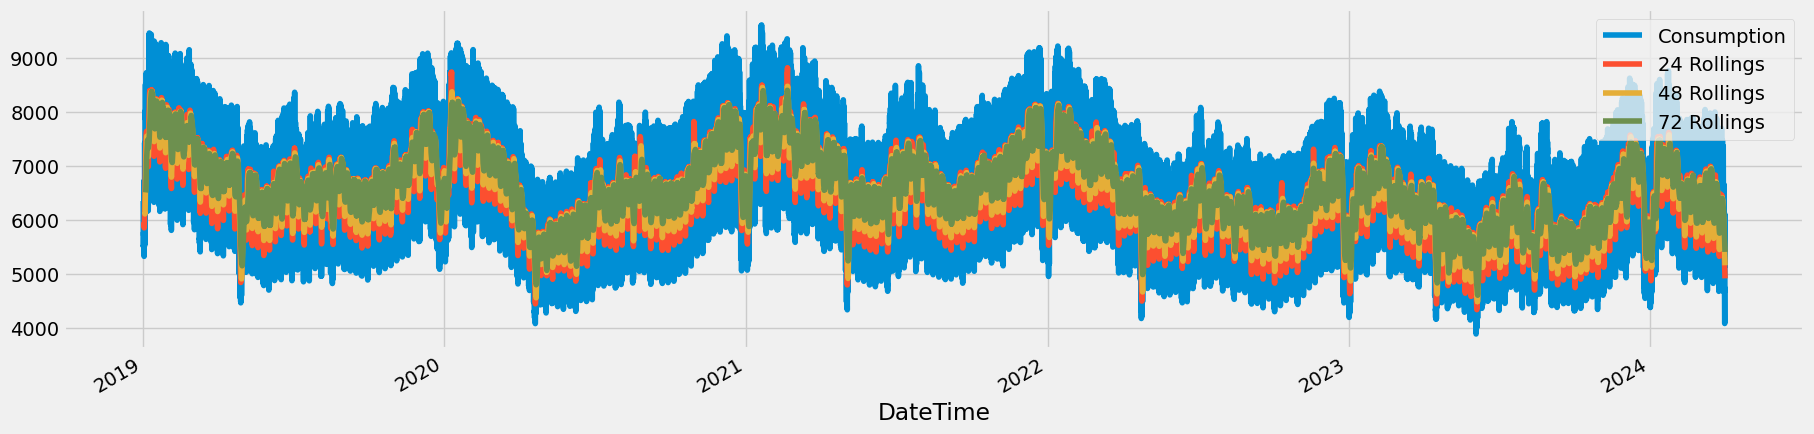

In [18]:
df_consumption['Consumption'].plot(figsize=(20,5),label='Consumption')
df_consumption['Consumption'].rolling(24).mean().plot(figsize=(20,5),label='24 Rollings')
df_consumption['Consumption'].rolling(48).mean().plot(figsize=(20,5),label='48 Rollings')
df_consumption['Consumption'].rolling(72).mean().plot(figsize=(20,5),label='72 Rollings')
plt.legend()
plt.show()

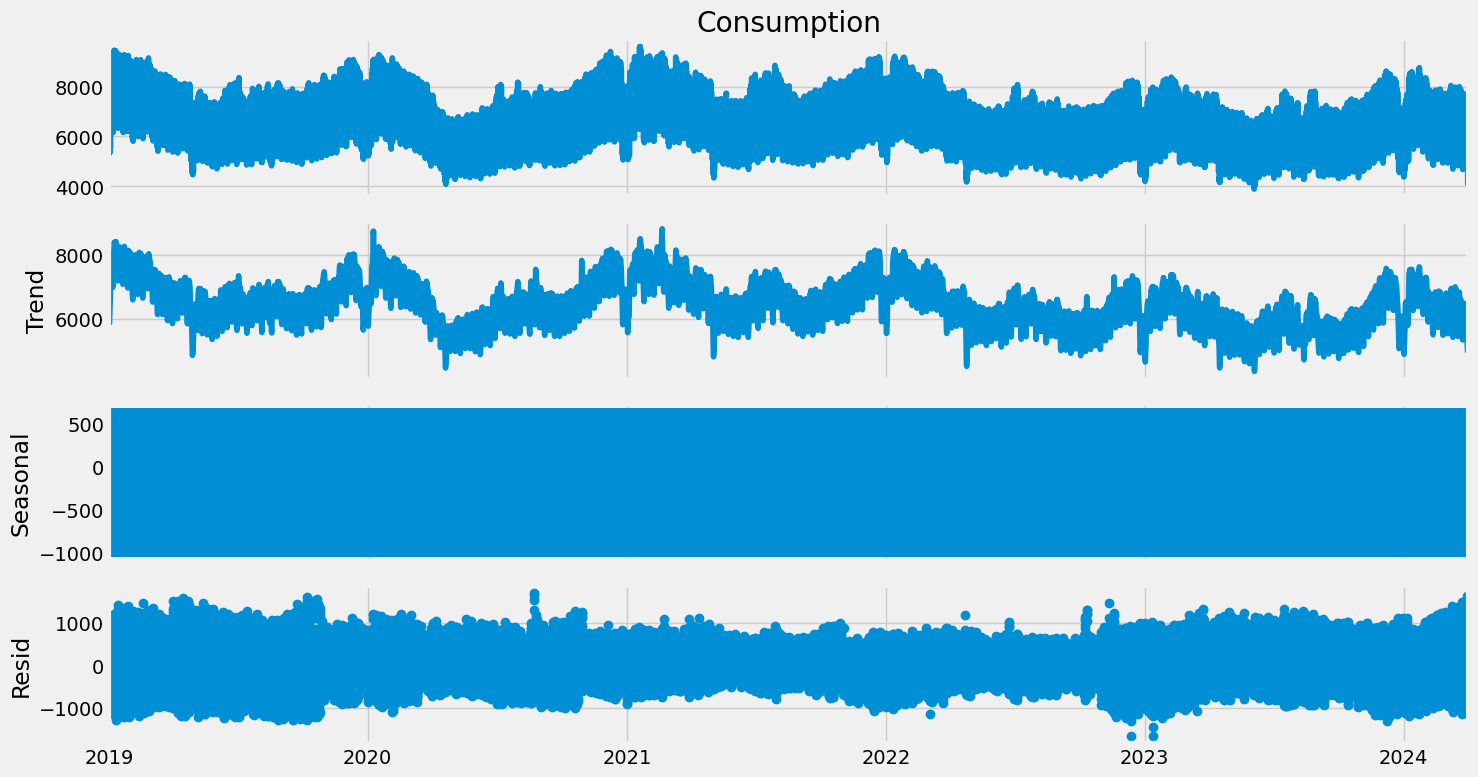

In [19]:
plt.rcParams["figure.figsize"] = (15,8)
decomp=seasonal_decompose(df_consumption['Consumption'], model='additive', period=24)
decomp.plot()
plt.show()

**Consumption y Production**

In [20]:
df_new=df[['DateTime','Consumption','Production']]
df_new['DateTime'] = pd.to_datetime(df_new['DateTime'], format='%Y-%m-%dT%H:%M:%SZ')
df_new=df_new.set_index('DateTime')
print(df_new.index.duplicated().any())
duplicados = df_new[df_new.index.duplicated(keep=False)]
print(duplicados) 

True
                     Consumption  Production
DateTime                                    
2019-10-27 03:00:00         5186        4478
2019-10-27 03:00:00         5196        4459
2019-10-27 03:00:00         5196        4459
2020-10-25 03:00:00         5181        5356
2020-10-25 03:00:00         5220        5412
2020-10-25 03:00:00         5220        5412
2021-10-31 03:00:00         5351        5265
2021-10-31 03:00:00         5341        5258
2021-10-31 03:00:00         5341        5258
2022-10-30 03:00:00         4475        5266
2022-10-30 03:00:00         4503        5269
2022-10-30 03:00:00         4503        5269
2023-10-29 03:00:00         4626        4402
2023-10-29 03:00:00         4607        4412


In [21]:
df_new = df_new.groupby(df_new.index).mean()

In [22]:
df_new = df_new.asfreq('1h')
df_new['Date']=df_new.index.date
df_new['Time']=df_new.index.time
df_new

,Consumption,Production,Date,Time
DateTime,,,,
2019-01-01 00:00:00,6352.0,6527.0,2019-01-01,00:00:00
2019-01-01 01:00:00,6116.0,5701.0,2019-01-01,01:00:00
2019-01-01 02:00:00,5873.0,5676.0,2019-01-01,02:00:00
2019-01-01 03:00:00,5682.0,5603.0,2019-01-01,03:00:00
2019-01-01 04:00:00,5557.0,5454.0,2019-01-01,04:00:00
...,...,...,...,...
2024-03-31 19:00:00,5618.0,5902.0,2024-03-31,19:00:00
2024-03-31 20:00:00,6107.0,6205.0,2024-03-31,20:00:00
2024-03-31 21:00:00,5991.0,5855.0,2024-03-31,21:00:00


In [23]:
# valores vacios
df_new.isnull().sum()

Consumption    6
Production     6
Date           0
Time           0
dtype: int64

In [24]:
# Rellenar usando el valor de la fila anterior y luego con la siguiente
df_new = df_new.fillna(method='ffill').fillna(method='bfill')
df_new.isnull().sum()

Consumption    0
Production     0
Date           0
Time           0
dtype: int64

In [25]:
# Verificar que un índice temporal está completo
# ==============================================================================
fecha_inicio = df_new.index.min()
fecha_fin = df_new.index.max()
date_range_completo = pd.date_range(start=fecha_inicio, end=fecha_fin, freq=df_new.index.freq)
print(f"Índice completo: {(df_new.index == date_range_completo).all()}")
print(f"Filas con valores ausentes: {df_new.isnull().any(axis=1).mean()}")

Índice completo: True
Filas con valores ausentes: 0.0


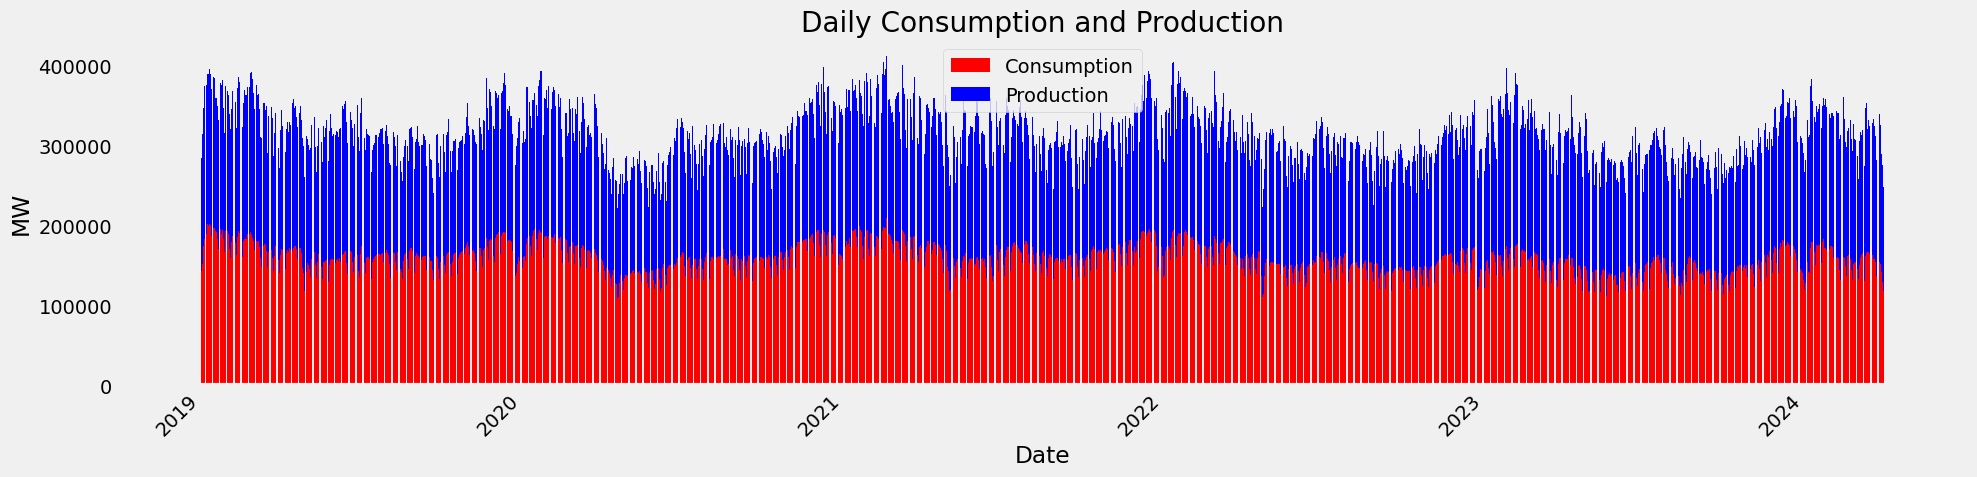

In [26]:
daily_consumption=df_new.groupby('Date')['Consumption'].agg('sum')
daily_production=df_new.groupby('Date')['Production'].agg('sum')
# Create the combined plot
fig, ax = plt.subplots(figsize=(20, 5)) # Create figure and axis
# Plot consumption (red) and production (blue) on the same axis
ax.bar(daily_consumption.index, daily_consumption, color='red', label='Consumption')
ax.bar(daily_production.index, daily_production, color='blue', label='Production', bottom=daily_consumption.values)
# Set labels, title, and legend
ax.set_xlabel('Date')
ax.set_ylabel('MW')
plt.title('Daily Consumption and Production')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability (optional)
plt.legend()
plt.grid(False) # Add grid lines for better readability (optional)
plt.tight_layout() # Adjust spacing to prevent overlapping elements (optional)
plt.show()


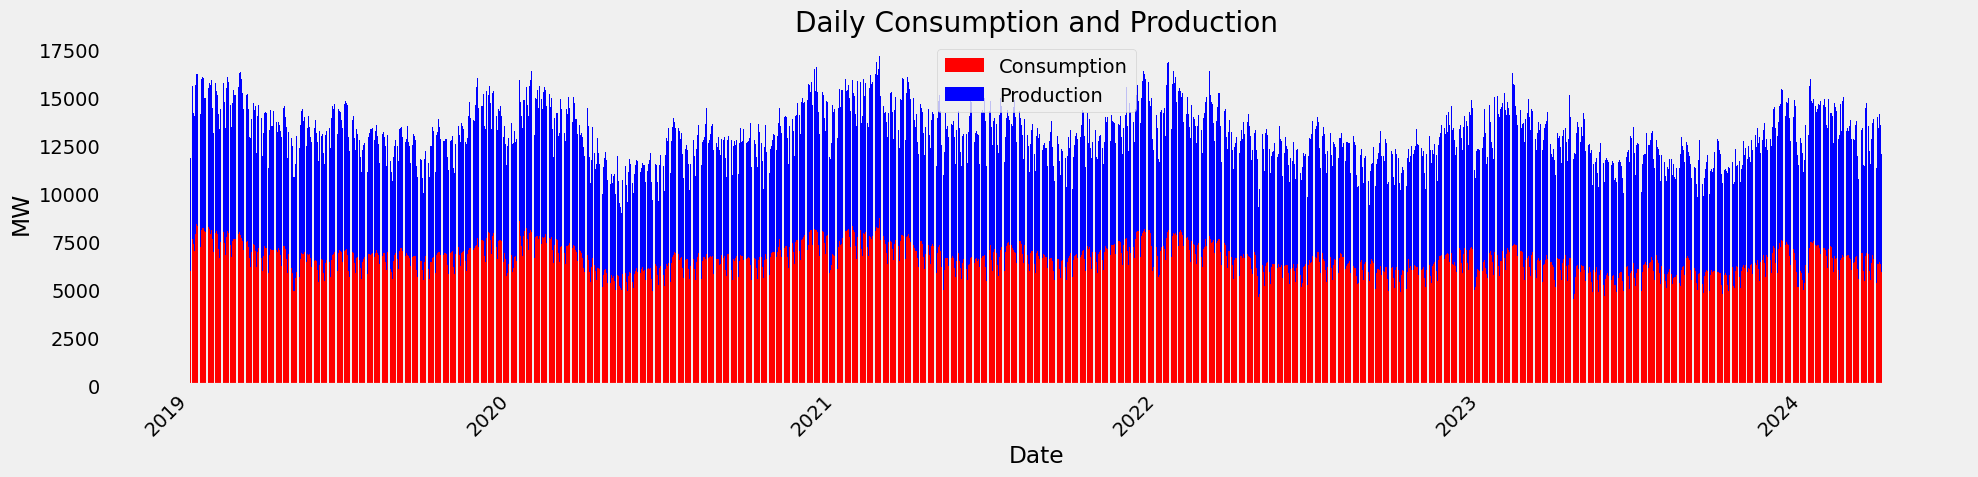

In [27]:
daily_consumption=df_new.groupby('Date')['Consumption'].agg('mean')
daily_production=df_new.groupby('Date')['Production'].agg('mean')
# Create the combined plot
fig, ax = plt.subplots(figsize=(20, 5)) # Create figure and axis
# Plot consumption (red) and production (blue) on the same axis
ax.bar(daily_consumption.index, daily_consumption, color='red', label='Consumption')
ax.bar(daily_production.index, daily_production, color='blue', label='Production', bottom=daily_consumption.values)
# Set labels, title, and legend
ax.set_xlabel('Date')
ax.set_ylabel('MW')
plt.title('Daily Consumption and Production')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability (optional)
plt.legend()
plt.grid(False) # Add grid lines for better readability (optional)
plt.tight_layout() # Adjust spacing to prevent overlapping elements (optional)
plt.show()

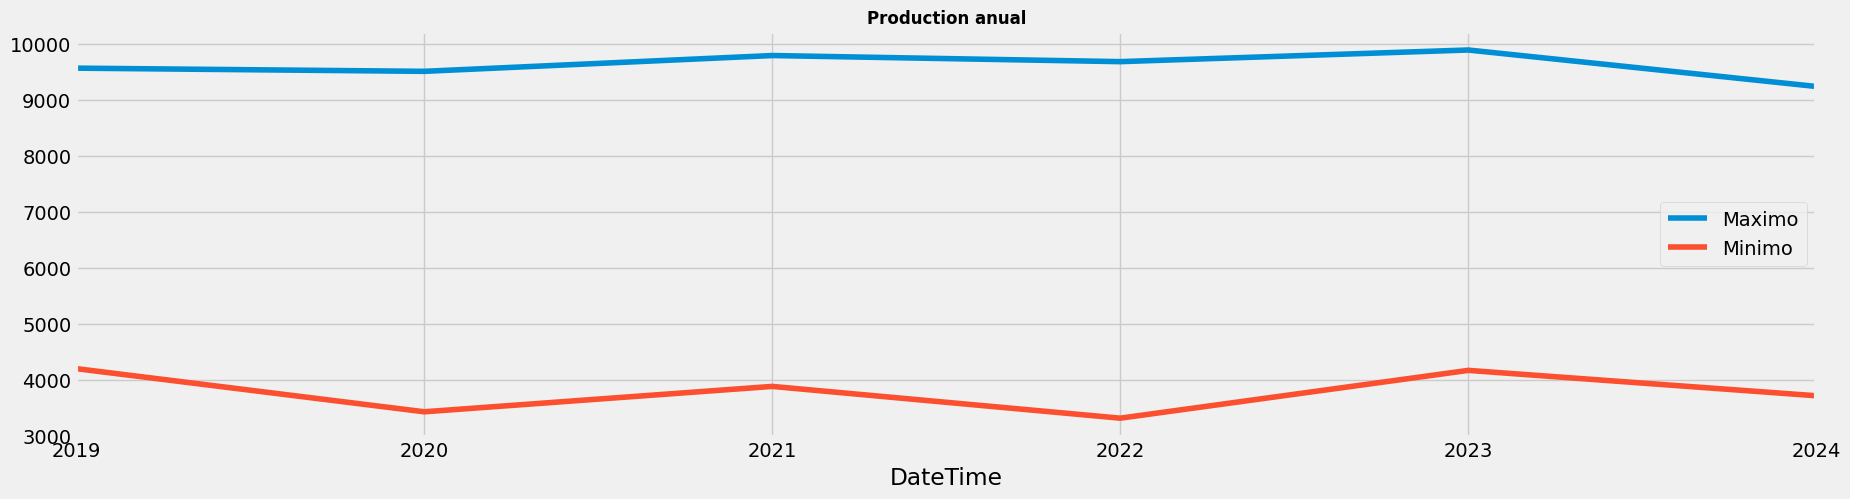

In [28]:
# Frecuencia Anual
df_new.resample(rule='A').max()['Production'].plot(figsize=(20,5),label='Maximo')
df_new.resample(rule='A').min()['Production'].plot(figsize=(20,5),label='Minimo')
plt.title('Production anual',fontsize=12,weight='bold')
plt.legend()
plt.show()

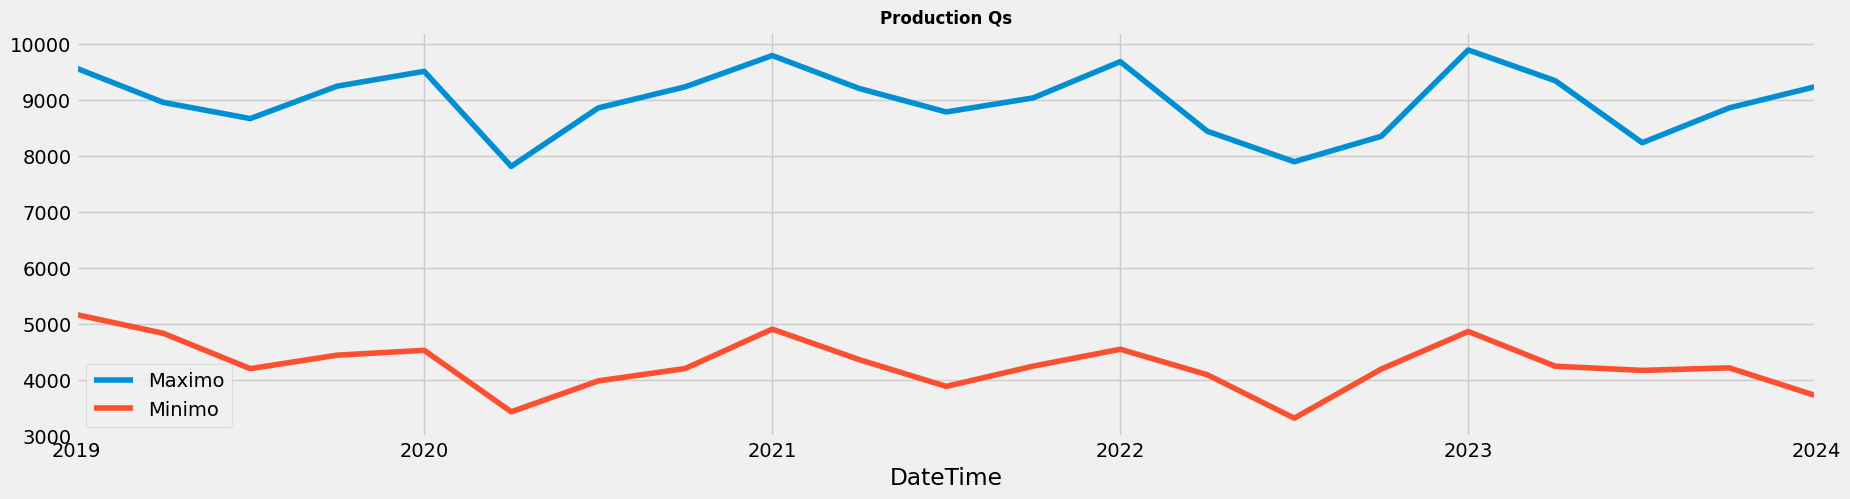

In [29]:
# Frecuencia Mensual
df_new.resample(rule='Qs').max()['Production'].plot(figsize=(20,5),label='Maximo')
df_new.resample(rule='Qs').min()['Production'].plot(figsize=(20,5),label='Minimo')
plt.title('Production Qs',fontsize=12,weight='bold')
plt.legend()
plt.show()

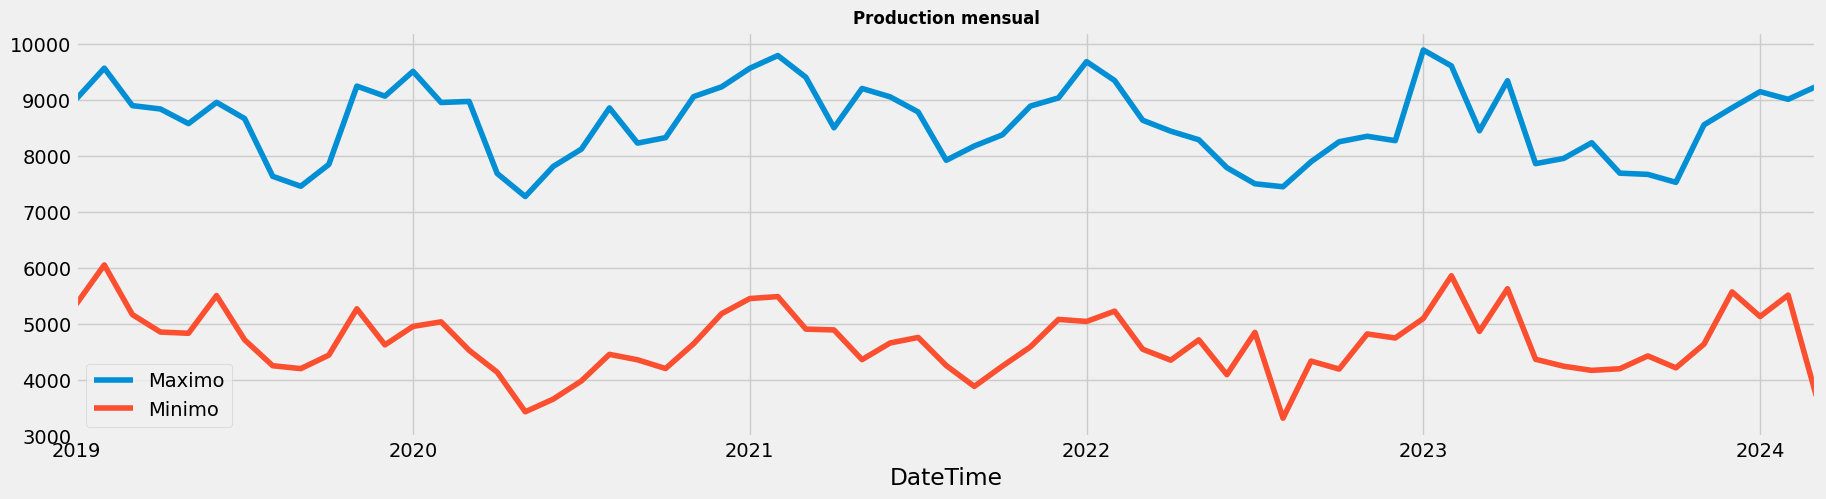

In [30]:
# Frecuencia Mensual
df_new.resample(rule='M').max()['Production'].plot(figsize=(20,5),label='Maximo')
df_new.resample(rule='M').min()['Production'].plot(figsize=(20,5),label='Minimo')
plt.title('Production mensual',fontsize=12,weight='bold')
plt.legend()
plt.show()

## **Entrenamiento**

In [31]:
fin_train = '2023-06-30 00:00:00'
fin_validacion = '2024-01-31 00:00:00'
datos_train = df_new.loc[: fin_train, :].copy()
datos_val   = df_new.loc[fin_train:fin_validacion, :].copy()
datos_test  = df_new.loc[fin_validacion:, :].copy()
print(f"Fechas train      : {datos_train.index.min()} --- {datos_train.index.max()}  (n={len(datos_train)})")
print(f"Fechas validacion : {datos_val.index.min()} --- {datos_val.index.max()}  (n={len(datos_val)})")
print(f"Fechas test       : {datos_test.index.min()} --- {datos_test.index.max()}  (n={len(datos_test)})")

Fechas train      : 2019-01-01 00:00:00 --- 2023-06-30 00:00:00  (n=39385)
Fechas validacion : 2023-06-30 00:00:00 --- 2024-01-31 00:00:00  (n=5161)
Fechas test       : 2024-01-31 00:00:00 --- 2024-03-31 23:00:00  (n=1464)


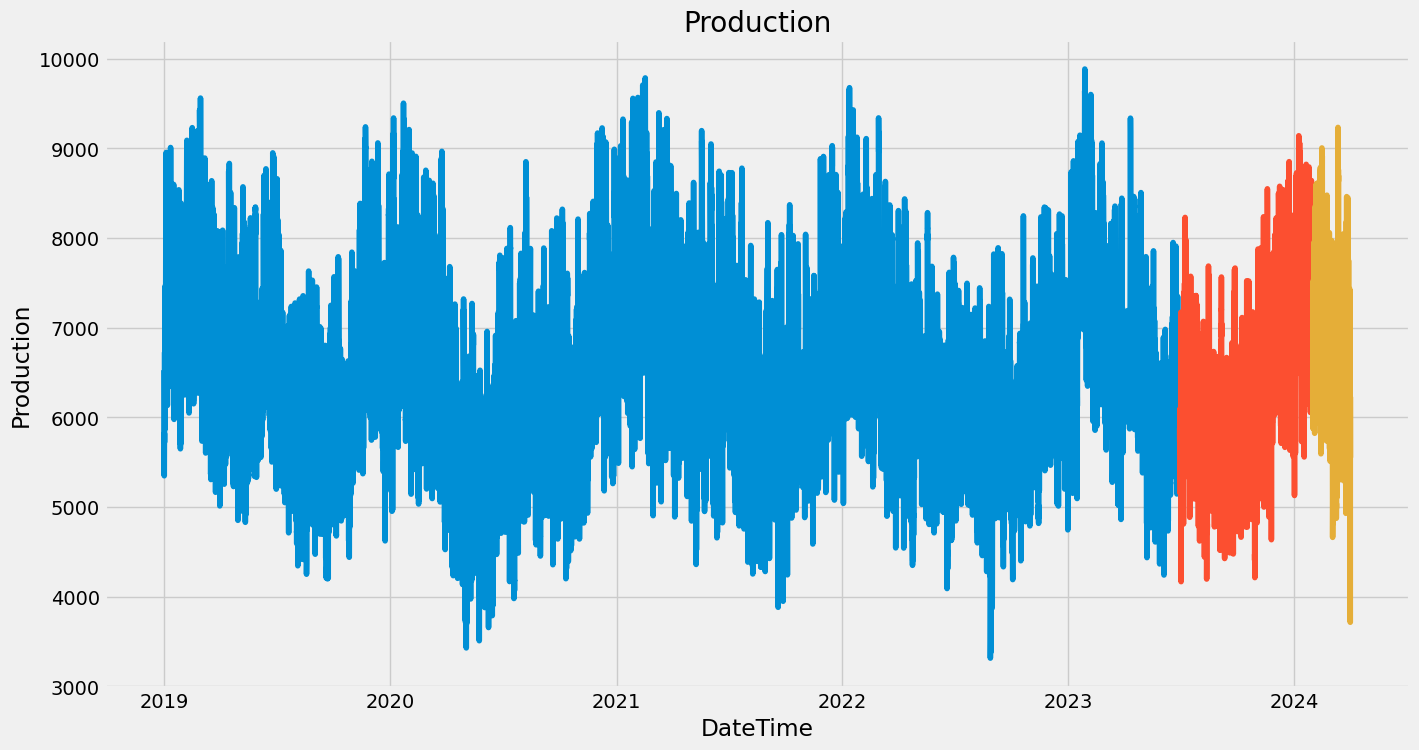

In [32]:
sns.lineplot(data=datos_train,x=datos_train.index,y=datos_train['Production'])
sns.lineplot(data=datos_val,x=datos_val.index,y=datos_val['Production'])
sns.lineplot(data=datos_test,x=datos_test.index,y=datos_test['Production'])
plt.title('Production')
plt.show()

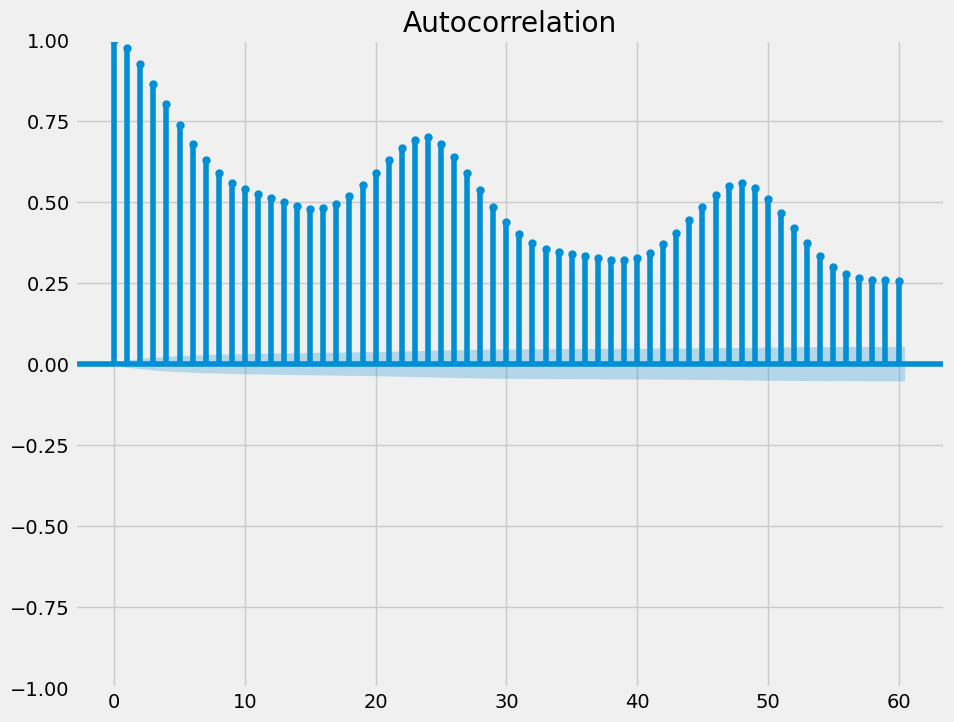

In [33]:
# Graficos de autocorrelación
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
fig, ax = plt.subplots(figsize=(10, 8))
plot_acf(df_new['Production'], ax=ax, lags=60)
plt.show()

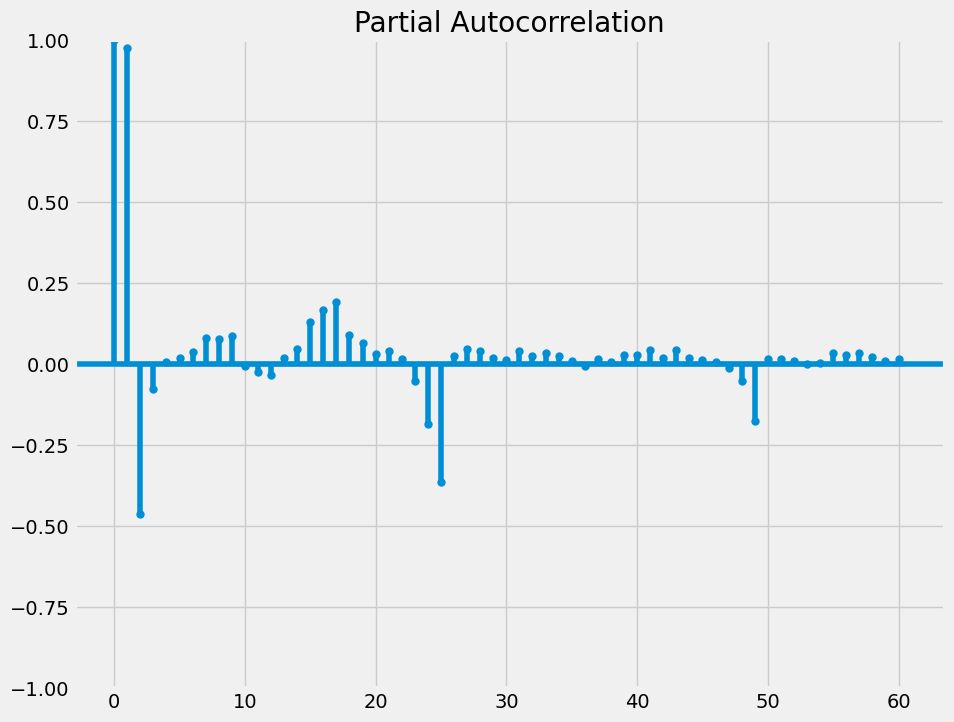

In [34]:
# Gráfico autocorrelación parcial
fig, ax = plt.subplots(figsize=(10, 8))
plot_pacf(df_new['Production'], ax=ax, lags=60)
plt.show()

* **Escalar los datos**

In [35]:
from sklearn.preprocessing import MinMaxScaler
# escalar los datos
scaler=MinMaxScaler()
datos_train_scaled=scaler.fit_transform(datos_train[['Production']])
datos_val_scaled = scaler.transform(datos_val[['Production']])
datos_test_scaled = scaler.transform(datos_test[['Production']])

In [36]:
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 24  # Ventanas de 24 horas
X_train, y_train = create_sequences(datos_train_scaled, sequence_length)
X_val, y_val = create_sequences(datos_val_scaled, sequence_length)
X_test, y_test = create_sequences(datos_test_scaled, sequence_length)

In [37]:
print(f"Shape X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Shape X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"Shape X_test: {X_test.shape}, y_test: {y_test.shape}")

Shape X_train: (39361, 24, 1), y_train: (39361, 1)
Shape X_val: (5137, 24, 1), y_val: (5137, 1)
Shape X_test: (1440, 24, 1), y_test: (1440, 1)


## **MODELO LSTM**

In [38]:
# Crear el modelo
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 24, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

## **Entrenar el Modelo**

In [44]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/20
1231/1231 ━━━━━━━━━━━━━━━━━━━━ 89s 59ms/step - loss: 0.0112 - val_loss: 0.0010
Epoch 2/20
1231/1231 ━━━━━━━━━━━━━━━━━━━━ 64s 52ms/step - loss: 0.0010 - val_loss: 9.6932e-04
Epoch 3/20
1231/1231 ━━━━━━━━━━━━━━━━━━━━ 56s 45ms/step - loss: 8.9528e-04 - val_loss: 8.2628e-04
Epoch 4/20
1231/1231 ━━━━━━━━━━━━━━━━━━━━ 72s 58ms/step - loss: 9.1053e-04 - val_loss: 7.9357e-04
Epoch 5/20
1231/1231 ━━━━━━━━━━━━━━━━━━━━ 66s 53ms/step - loss: 8.8417e-04 - val_loss: 8.1158e-04
Epoch 6/20
1231/1231 ━━━━━━━━━━━━━━━━━━━━ 71s 57ms/step - loss: 8.5155e-04 - val_loss: 8.4649e-04
Epoch 7/20
1231/1231 ━━━━━━━━━━━━━━━━━━━━ 56s 45ms/step - loss: 8.4192e-04 - val_loss: 0.0010
Epoch 8/20
1231/1231 ━━━━━━━━━━━━━━━━━━━━ 59s 48ms/step - loss: 8.1037e-04 - val_loss: 8.9879e-04
Epoch 9/20
1231/1231 ━━━━━━━━━━━━━━━━━━━━ 55s 45ms/step - loss: 8.0476e-04 - val_loss: 7.9786e-04
Epoch 10/20
1231/1231 ━━━━━━━━━━━━━━━━━━━━ 45s 36ms/step - loss: 8.0742e-04 - val_loss: 8.8096e-04
Epoch 11/20
1231/1231 ━━━━━━━━━━━━━

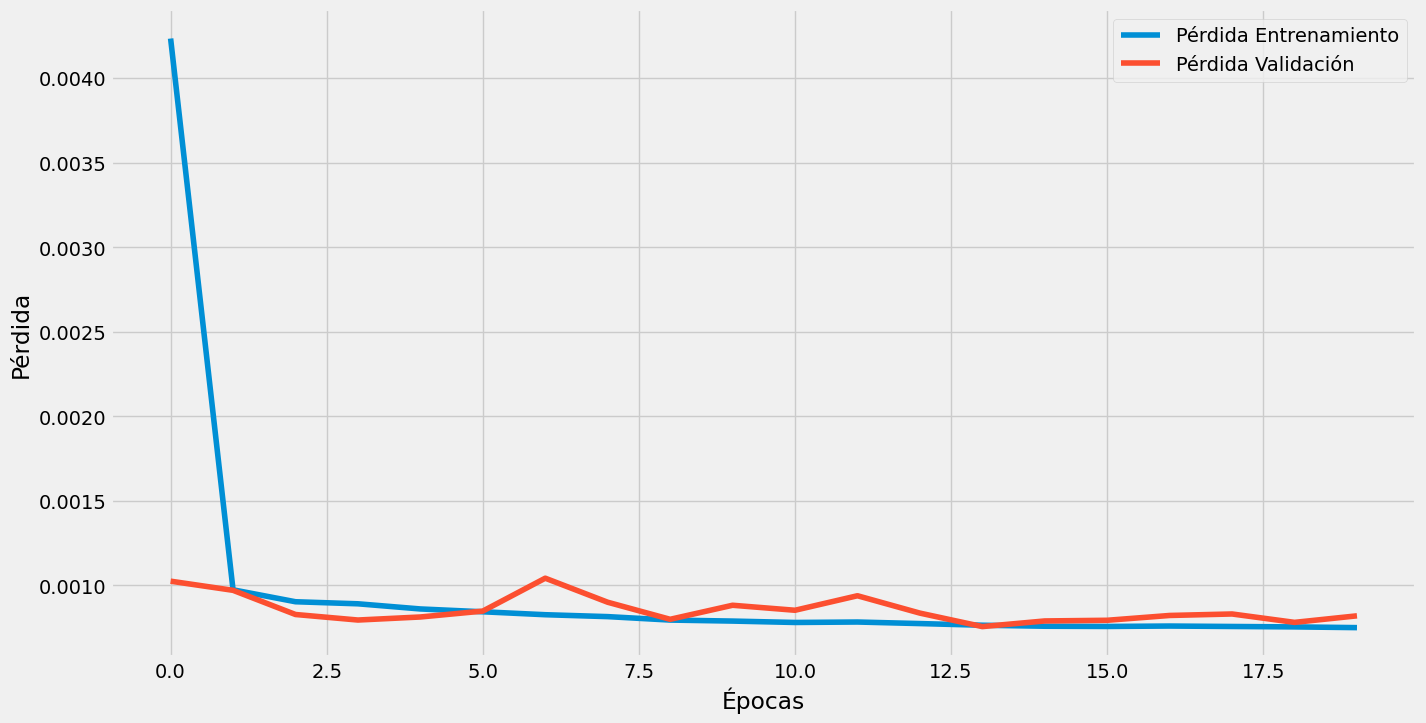

In [54]:
# Graficar la pérdida
plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

In [45]:
# Evaluar y predecir 
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

# Predecir
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Escalar y_test de vuelta
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0010
Test Loss: 0.001170347910374403
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step


In [53]:
# Calcular MAE
r2=r2_score(y_test_original,predictions)
print(f"R2 : {r2:.2f}")

mse=mean_squared_error(y_test_original,predictions)
print(f"Mean Squared Error (MSE) : {mse:.2f}")

mae = mean_absolute_error(y_test_original, predictions)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test_original, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

R2 : 0.93
Mean Squared Error (MSE) : 50533.32
Mean Absolute Error (MAE): 164.34
Root Mean Squared Error (RMSE): 224.80


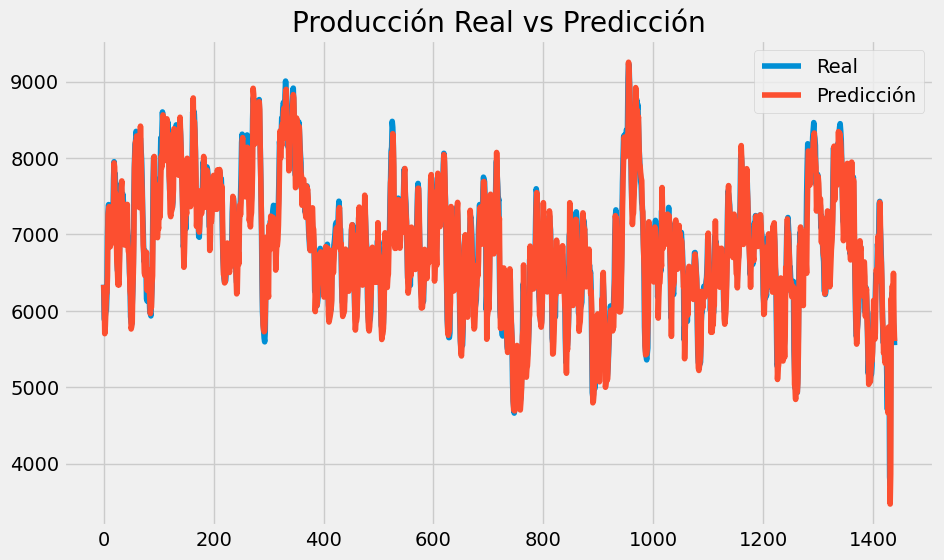

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_original, label='Real')
plt.plot(predictions, label='Predicción')
plt.legend()
plt.title('Producción Real vs Predicción')
plt.show()
